## Summary
I was confused as to what is it that we are trying to forecast in this competition. Apparently, if you group your test set by `installation_id` you will get a long list of the activities of a user. It contains games, clips, activities, Assessments, etc. We should use this history to predict the very last row of each `installation_id`. Below is an example for the first user in test set `00abaee7`. This data shows, he/she started the app, watched the welcome to app clip, then magma peak - level 1 clip and then two other clips. Then he/she played the "Chow Time" game. As you scroll down you can see all of his/her acitivies. At the very end of the activities list you can see that he/she started to play "Cauldron Filler" Assessment task which only has 1 row. The test set is truncated there to indicate that we should predict this user's Assessment on this task.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train = pd.read_csv('/kaggle/input/data-science-bowl-2019/train.csv')
train_labels = pd.read_csv('/kaggle/input/data-science-bowl-2019/train_labels.csv')
specs = pd.read_csv('/kaggle/input/data-science-bowl-2019/specs.csv')
test = pd.read_csv('/kaggle/input/data-science-bowl-2019/test.csv')
submission = pd.read_csv('/kaggle/input/data-science-bowl-2019/sample_submission.csv')

In [3]:
pd.set_option('max_rows', None)
test.query('installation_id=="00abaee7"').head(20)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES
5,f93fc684,a022c3f60ba547e7,2019-09-10T16:54:14.338Z,"{""coordinates"":{""x"":515,""y"":697,""stage_width"":...",00abaee7,2,4010,2232,Chow Time,Game,CRYSTALCAVES
6,7ec0c298,a022c3f60ba547e7,2019-09-10T16:54:16.553Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,3,3010,4445,Chow Time,Game,CRYSTALCAVES
7,0d1da71f,a022c3f60ba547e7,2019-09-10T16:54:23.364Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,4,3110,11251,Chow Time,Game,CRYSTALCAVES
8,63f13dd7,a022c3f60ba547e7,2019-09-10T16:54:23.365Z,"{""dinosaur"":""stacey"",""diet"":""herbivore"",""targe...",00abaee7,5,2020,11251,Chow Time,Game,CRYSTALCAVES
9,7372e1a5,a022c3f60ba547e7,2019-09-10T16:54:25.029Z,"{""coordinates"":{""x"":901,""y"":449,""stage_width"":...",00abaee7,6,4070,12929,Chow Time,Game,CRYSTALCAVES


In [4]:
test.query('installation_id=="00abaee7"').tail(5)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
863,832735e1,ee2200d38a57537b,2019-09-12T13:51:37.371Z,"{""description"":""There we have it, folks. Some ...",00abaee7,132,3010,178304,Dino Dive,Game,MAGMAPEAK
864,ab3136ba,ee2200d38a57537b,2019-09-12T13:51:44.003Z,"{""description"":""There we have it, folks. Some ...",00abaee7,133,3110,184938,Dino Dive,Game,MAGMAPEAK
865,832735e1,ee2200d38a57537b,2019-09-12T13:51:47.877Z,"{""description"":""Okay, team, we have to win fou...",00abaee7,134,3010,188805,Dino Dive,Game,MAGMAPEAK
866,7961e599,ee2200d38a57537b,2019-09-12T13:51:47.878Z,"{""target_water_level"":3,""round"":5,""event_count...",00abaee7,135,2020,188805,Dino Dive,Game,MAGMAPEAK
867,90d848e0,348d7f09f96af313,2019-09-12T13:52:12.193Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


## Baseline model
Now to get started with a very basic baseline and make everything more clear, I have used the mode value of each Assessment task in the train_labels set and used them as predictions. As you see it gives us LB 0.395

In [5]:
labels_map = dict(train_labels.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0])) # get the mode
labels_map

{'Bird Measurer (Assessment)': 0,
 'Cart Balancer (Assessment)': 3,
 'Cauldron Filler (Assessment)': 3,
 'Chest Sorter (Assessment)': 0,
 'Mushroom Sorter (Assessment)': 3}

In [6]:
submission['accuracy_group'] = test.groupby('installation_id').last()['title'].map(labels_map).reset_index(drop=True)
submission.to_csv('submission.csv', index=None)
submission.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


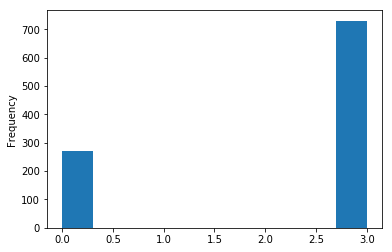

In [7]:
submission['accuracy_group'].plot(kind='hist')

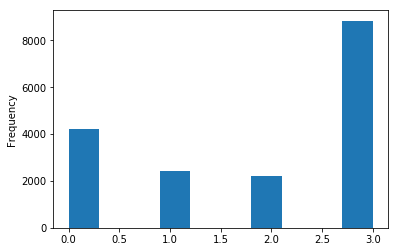

In [8]:
train_labels['accuracy_group'].plot(kind='hist')

Hope this gets you started. Kudos to yasufuminakama for clarifying it for me. 

Happy kaggling!